In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series

import matplotlib.pyplot as plt

##  离群数据处理

删除离群的数据,也就是赋值为 NaN

* 训练数据和测试数据一起处理
* 需要处理的数据是 bill,browser(train 14%,test 13% 缺失率)

In [10]:
names = ["userid","time","bank_id","pre_amount_of_bill","pre_repayment","credit_amount",\
         "amount_of_bill_left","least_repayment","consume_amount","amount_of_bill","adjust_amount",\
         "circ_interest","avail_amount","prepare_amount","repayment_state"]

bill_train = pd.read_csv("../../pcredit/train/bill_detail_train.txt",header=None)
bill_test = pd.read_csv("../../pcredit/test/bill_detail_test.txt",header=None)

bill_data = pd.concat([bill_train,bill_test])
bill_data.columns=names
bill_data.head()

,userid,time,bank_id,pre_amount_of_bill,pre_repayment,credit_amount,amount_of_bill_left,least_repayment,consume_amount,amount_of_bill,adjust_amount,circ_interest,avail_amount,prepare_amount,repayment_state
0,3150,5906744363,6,18.626118,18.661937,20.664418,18.905766,17.847133,1,0.0,0.0,0.0,0.0,19.971271,0
1,3150,5906744401,6,18.905766,18.909954,20.664418,19.113305,17.911506,1,0.0,0.0,0.0,0.0,19.971271,0
2,3150,5906744427,6,19.113305,19.150290,20.664418,19.300194,17.977610,1,0.0,0.0,0.0,0.0,19.971271,0
3,3150,5906744515,6,19.300194,19.300280,21.000890,20.303240,18.477177,1,0.0,0.0,0.0,0.0,20.307743,0
4,3150,5906744562,6,20.303240,20.307744,21.000890,20.357134,18.510985,1,0.0,0.0,0.0,0.0,20.307743,0


**获取消费笔数**

In [11]:
#  1)获取消费笔数  
consume_amount = bill_data[['userid','consume_amount']]
consume_amount = pd.pivot_table(consume_amount,index=['userid'],values=['consume_amount'],aggfunc=np.sum)
consume_amount.head()

,consume_amount
userid,
2,58
3,4
4,2
5,0
6,122


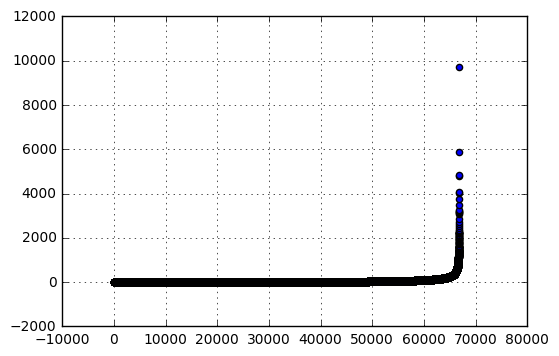

In [12]:
#  消费笔数的数据分布图
data = consume_amount['consume_amount'].sort_values()
nn = range(len(data))
plt.scatter(nn,data)
plt.grid(True)
plt.show()

**消费笔数大于 4000 的属于离群数据,同样赋值 4000 处理**

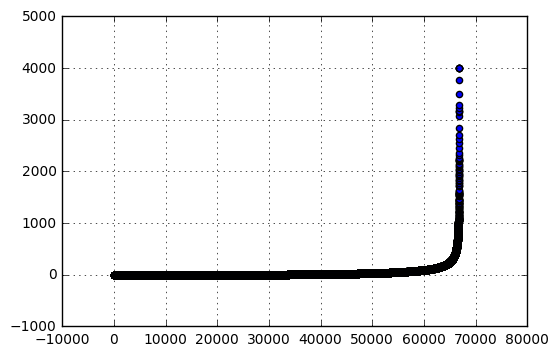

In [14]:
consume_amount[consume_amount['consume_amount']>4000] = 4000
#  修改后的消费笔数的数据分布图
data = consume_amount['consume_amount'].sort_values()
nn = range(len(data))
plt.scatter(nn,data)
plt.grid(True)
plt.show()

**消费笔数大于 2500 的属于离群数据,同样赋值 2000 加上一个 [-500,500]的一个随机数**

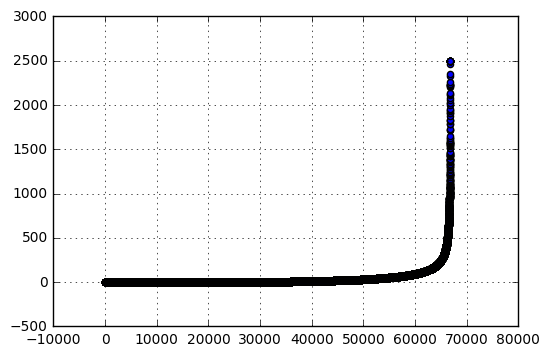

In [27]:
n = len(consume_amount[consume_amount['consume_amount']>2500])
consume_amount[consume_amount['consume_amount']>2500] = np.random.randint(-500,500,size=n) + 2000
#  修改后的消费笔数的数据分布图
data = consume_amount['consume_amount'].sort_values()
nn = range(len(data))
plt.scatter(nn,data)
plt.grid(True)
plt.show()

In [72]:
#  离散化
consume_amount['consume_amount'] = pd.cut(consume_amount['consume_amount'],20,labels=range(1,21))
consume_amount.head()

,consume_amount
userid,
2,1
3,1
4,1
5,1
6,1


**信用卡额度 credit_amount**

In [39]:
# 信用卡额度 credit_amount
credit_amount = bill_data[['userid','credit_amount']]
credit_amount = pd.pivot_table(credit_amount,index=['userid'],values=['credit_amount'],aggfunc=np.mean)
credit_amount.head()

,credit_amount
userid,
2,18.638974
3,18.361833
4,16.055204
5,20.664418
6,20.567794


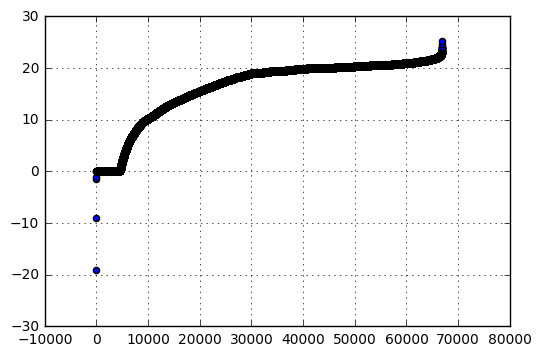

In [40]:
data = credit_amount['credit_amount'].sort_values()
nn = range(len(data))
plt.scatter(nn,data)
plt.grid(True)
plt.show()

离群点 < 0,变为 0-5 的随机浮点数

In [33]:
5 * np.random.random_sample(3)

array([ 0.69801188,  4.46906225,  3.70249284])

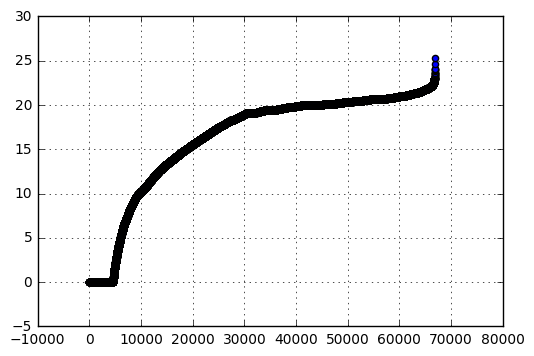

In [41]:
n = len(credit_amount[credit_amount['credit_amount']<0])
credit_amount[credit_amount['credit_amount']<0] = 5*np.random.random_sample((n,1))
#  修改后的消费笔数的数据分布图
data = credit_amount['credit_amount'].sort_values()
nn = range(len(data))
plt.scatter(nn,data)
plt.grid(True)
plt.show()

**可用金额  avail_amount**

In [36]:
#  可用金额  avail_amount
avail_amount = bill_data[['userid','avail_amount']]
avail_amount = pd.pivot_table(avail_amount,index=['userid'],values=['avail_amount'],aggfunc=np.mean)
avail_amount.head()

,avail_amount
userid,
2,0.000000
3,0.000000
4,1.014342
5,0.000000
6,2.447743


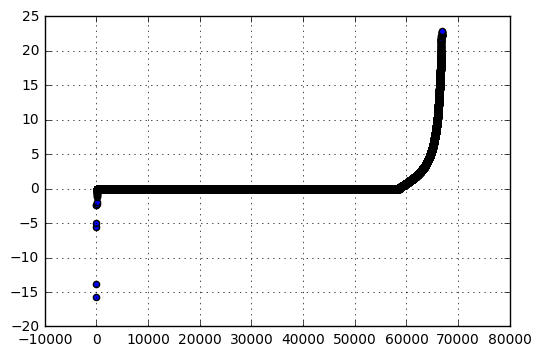

In [37]:
data = avail_amount['avail_amount'].sort_values()
nn = range(len(data))
plt.scatter(nn,data)
plt.grid(True)
plt.show()

可用金额  avail_amount,离群点赋值为 0

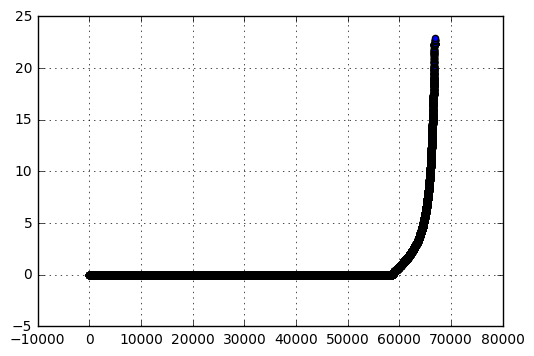

In [42]:
n = len(avail_amount[avail_amount['avail_amount']<0])
avail_amount[avail_amount['avail_amount']<0] = np.zeros((n,1))
#  修改后的消费笔数的数据分布图
data = avail_amount['avail_amount'].sort_values()
nn = range(len(data))
plt.scatter(nn,data)
plt.grid(True)
plt.show()

**预借现金额度  prepare_amount**

In [43]:
# 预借现金额度  prepare_amount
prepare_amount = bill_data[['userid','prepare_amount']]
prepare_amount = pd.pivot_table(prepare_amount,index=['userid'],values=['prepare_amount'],aggfunc=np.mean)
prepare_amount.head()

,prepare_amount
userid,
2,7.087560
3,0.000000
4,7.808445
5,19.971271
6,13.788434


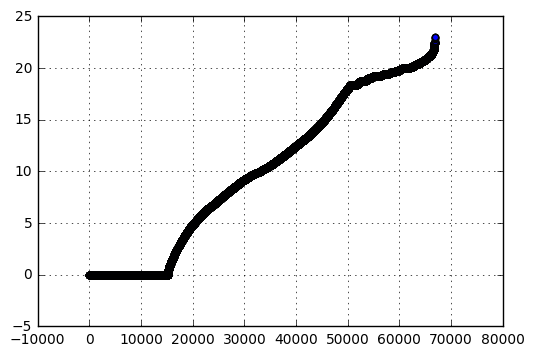

In [44]:
data = prepare_amount['prepare_amount'].sort_values()
nn = range(len(data))
plt.scatter(nn,data)
plt.grid(True)
plt.show()

**循环利息 circ_interest**

In [45]:
# 循环利息 circ_interest
circ_interest = bill_data[['userid','circ_interest']]
circ_interest = pd.pivot_table(circ_interest,index=['userid'],values=['circ_interest'],aggfunc=np.mean)
circ_interest.head()

,circ_interest
userid,
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0


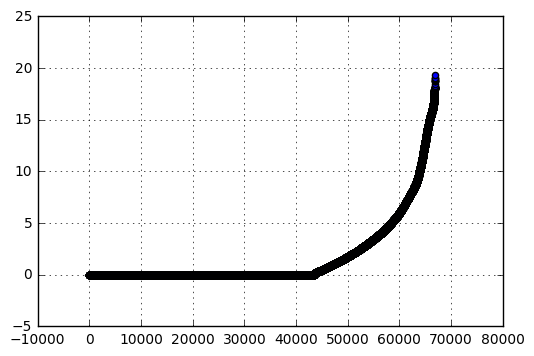

In [46]:
data = circ_interest['circ_interest'].sort_values()
nn = range(len(data))
plt.scatter(nn,data)
plt.grid(True)
plt.show()

**合并处理过的异常数据**

In [73]:
bill_datas = consume_amount.join([circ_interest,prepare_amount,avail_amount,credit_amount])
bill_datas.head()

,consume_amount,circ_interest,prepare_amount,avail_amount,credit_amount
userid,,,,,
2,1,0.0,7.087560,0.000000,18.638974
3,1,0.0,0.000000,0.000000,18.361833
4,1,0.0,7.808445,1.014342,16.055204
5,1,0.0,19.971271,0.000000,20.664418
6,1,0.0,13.788434,2.447743,20.567794


##  通过模型预测缺省值

目前通过随机森林来预测

In [49]:
#  合并用户信息,选出没有 bill_data 的用户,根据 bill_datas 来预测
user_info = pd.read_csv("../data/train/user_info_dummy.csv")
user_info.index = user_info['userid']
user_info.drop(['userid'],axis=1,inplace=True)
user_info.head()

,account#0,account#1,account#2,account#3,account#4,edu#0,edu#1,edu#2,edu#3,edu#4,...,job#4,marriage#0,marriage#1,marriage#2,marriage#3,marriage#4,marriage#5,sex#0,sex#1,sex#2
userid,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,1,...,1,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
5,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [74]:
user_bill = user_info.join([bill_datas])
user_bill.head()

,account#0,account#1,account#2,account#3,account#4,edu#0,edu#1,edu#2,edu#3,edu#4,...,marriage#4,marriage#5,sex#0,sex#1,sex#2,consume_amount,circ_interest,prepare_amount,avail_amount,credit_amount
userid,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1.0,0.0,7.087560,0.000000,18.638974
3,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,1.0,0.0,0.000000,0.000000,18.361833
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,1.0,0.0,7.808445,1.014342,16.055204
5,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1.0,0.0,19.971271,0.000000,20.664418


In [75]:
user_bill_null = user_bill[user_bill['consume_amount'].isnull()]
user_bill_null.head()

,account#0,account#1,account#2,account#3,account#4,edu#0,edu#1,edu#2,edu#3,edu#4,...,marriage#4,marriage#5,sex#0,sex#1,sex#2,consume_amount,circ_interest,prepare_amount,avail_amount,credit_amount
userid,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN
31,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN
33,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN
38,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN
41,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN


In [76]:
user_bill_not_null = user_bill[user_bill['consume_amount'].notnull()]
user_bill_not_null.head()

,account#0,account#1,account#2,account#3,account#4,edu#0,edu#1,edu#2,edu#3,edu#4,...,marriage#4,marriage#5,sex#0,sex#1,sex#2,consume_amount,circ_interest,prepare_amount,avail_amount,credit_amount
userid,,,,,,,,,,,,,,,,,,,,,
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1.0,0.0,7.087560,0.000000,18.638974
3,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,1.0,0.0,0.000000,0.000000,18.361833
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,1.0,0.0,7.808445,1.014342,16.055204
5,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1.0,0.0,19.971271,0.000000,20.664418
6,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,1.0,0.0,13.788434,2.447743,20.567794


In [57]:
user_info_cols = user_info.columns
bill_cols = bill_datas.columns

In [77]:
user_bill_train = user_bill_not_null[user_info_cols]
user_bill_res = user_bill_null[user_info_cols]

In [78]:
from sklearn.ensemble import RandomForestRegressor as RF
rf = RF()
for col in bill_cols:
    rf.fit(user_bill_train.values,user_bill_not_null[col])
    user_bill_null[col] = rf.predict(user_bill_res)
user_bill_null.head()

/home/hadoop/.local/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,account#0,account#1,account#2,account#3,account#4,edu#0,edu#1,edu#2,edu#3,edu#4,...,marriage#4,marriage#5,sex#0,sex#1,sex#2,consume_amount,circ_interest,prepare_amount,avail_amount,credit_amount
userid,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,1.206064,1.919220,9.939268,0.545838,15.418113
31,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1.173360,1.732604,9.322370,0.393260,15.359055
33,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1.197244,1.441707,10.603309,0.627232,16.991370
38,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,1.082037,1.683295,10.257973,0.431420,15.547000
41,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,1.045485,1.603297,10.184808,0.479157,16.410573


In [79]:
user_bill_all = pd.concat([user_bill_null,user_bill_not_null])
user_bill_all.head()

,account#0,account#1,account#2,account#3,account#4,edu#0,edu#1,edu#2,edu#3,edu#4,...,marriage#4,marriage#5,sex#0,sex#1,sex#2,consume_amount,circ_interest,prepare_amount,avail_amount,credit_amount
userid,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,1.206064,1.919220,9.939268,0.545838,15.418113
31,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1.173360,1.732604,9.322370,0.393260,15.359055
33,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1.197244,1.441707,10.603309,0.627232,16.991370
38,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,1.082037,1.683295,10.257973,0.431420,15.547000
41,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,1.045485,1.603297,10.184808,0.479157,16.410573


In [151]:
user_bill_all = user_bill_all.sort_index()
user_bill_all['consume_amount'] = np.round(user_bill_all['consume_amount'])
user_bill_all.head()

,account#0,account#1,account#2,account#3,account#4,edu#0,edu#1,edu#2,edu#3,edu#4,...,marriage#4,marriage#5,sex#0,sex#1,sex#2,consume_amount,circ_interest,prepare_amount,avail_amount,credit_amount
userid,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,1.0,1.91922,9.939268,0.545838,15.418113
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1.0,0.00000,7.087560,0.000000,18.638974
3,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,1.0,0.00000,0.000000,0.000000,18.361833
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,1.0,0.00000,7.808445,1.014342,16.055204
5,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1.0,0.00000,19.971271,0.000000,20.664418


In [64]:
user_bill_not_null.shape

(66817, 29)

In [65]:
user_bill_all.shape

(69495, 29)

In [152]:
user_bill_all.to_csv('../data/train/user_bill_all.csv')

##   浏览记录数据补全

In [82]:
"""
 用户id,时间戳,浏览行为数据,浏览子行为编号
"""
names = ['userid','time','browser_behavior','browser_behavior_number']
browse_history_train = pd.read_csv("../../pcredit/train/browse_history_train.txt",header=None)
browse_history_test = pd.read_csv("../../pcredit/test/browse_history_test.txt",header=None)

browse_history = pd.concat([browse_history_train,browse_history_test])
browse_history.columns = names
browse_history.head()

,userid,time,browser_behavior,browser_behavior_number
0,34801,5926003545,173,1
1,34801,5926003545,164,4
2,34801,5926003545,38,7
3,34801,5926003545,45,1
4,34801,5926003545,110,7


In [83]:
browse_history['count'] = np.ones(browse_history.shape[0])
browse_history.head()

,userid,time,browser_behavior,browser_behavior_number,count
0,34801,5926003545,173,1,1.0
1,34801,5926003545,164,4,1.0
2,34801,5926003545,38,7,1.0
3,34801,5926003545,45,1,1.0
4,34801,5926003545,110,7,1.0


In [84]:
browser_behavior_num = pd.pivot_table(browse_history,index=['userid','browser_behavior_number'],values=['count'],aggfunc=np.sum)
browser_behavior_num.head()

count
userid browser_behavior_number       
2      1                        540.0
       3                         90.0
       4                        150.0
       5                        105.0
       6                        135.0

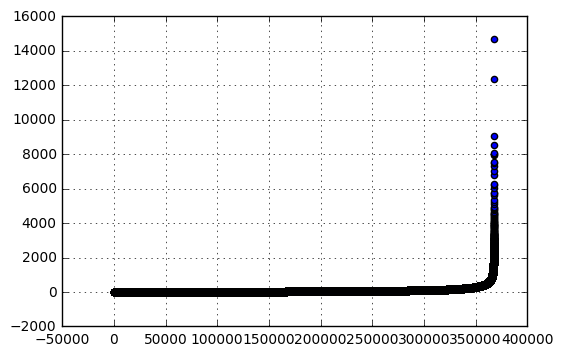

In [86]:
data = browser_behavior_num['count'].sort_values()
nn = range(len(data))
plt.scatter(nn,data)
plt.grid(True)
plt.show()

In [129]:
browser_behavior_num_un = browser_behavior_num.unstack()
browser_behavior_num_un.columns = [ 'browser_behavior_number#{}'.format(i) for i in range(1,12)]
browser_behavior_num_un.head()

,browser_behavior_number#1,browser_behavior_number#2,browser_behavior_number#3,browser_behavior_number#4,browser_behavior_number#5,browser_behavior_number#6,browser_behavior_number#7,browser_behavior_number#8,browser_behavior_number#9,browser_behavior_number#10,browser_behavior_number#11
userid,,,,,,,,,,,
2,540.0,NaN,90.0,150.0,105.0,135.0,105.0,105.0,NaN,75.0,NaN
3,174.0,NaN,NaN,48.0,30.0,24.0,42.0,NaN,NaN,24.0,NaN
4,164.0,NaN,4.0,64.0,36.0,32.0,36.0,4.0,NaN,24.0,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN
7,462.0,NaN,NaN,140.0,98.0,98.0,112.0,14.0,NaN,84.0,NaN


In [130]:
for col in browser_behavior_num_un.columns:
    browser_behavior_num_un[col] = pd.cut(browser_behavior_num_un[col],20,labels=range(1,21))
browser_behavior_num_un.head()

,browser_behavior_number#1,browser_behavior_number#2,browser_behavior_number#3,browser_behavior_number#4,browser_behavior_number#5,browser_behavior_number#6,browser_behavior_number#7,browser_behavior_number#8,browser_behavior_number#9,browser_behavior_number#10,browser_behavior_number#11
userid,,,,,,,,,,,
2,1.0,NaN,2.0,1.0,1.0,2.0,1,1.0,NaN,1.0,NaN
3,1.0,NaN,NaN,1.0,1.0,1.0,1,NaN,NaN,1.0,NaN
4,1.0,NaN,1.0,1.0,1.0,1.0,1,1.0,NaN,1.0,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
7,1.0,NaN,NaN,1.0,1.0,2.0,1,1.0,NaN,1.0,NaN


In [131]:
for col in browser_behavior_num_un.columns:
    print col,browser_behavior_num_un[browser_behavior_num_un[col].isnull()].shape
    browser_behavior_num_un[col] = browser_behavior_num_un[col].astype(float)

browser_behavior_number#1 (23, 11)
browser_behavior_number#2 (59265, 11)
browser_behavior_number#3 (49535, 11)
browser_behavior_number#4 (3549, 11)
browser_behavior_number#5 (14447, 11)
browser_behavior_number#6 (3257, 11)
browser_behavior_number#7 (2492, 11)
browser_behavior_number#8 (29241, 11)
browser_behavior_number#9 (58168, 11)
browser_behavior_number#10 (5463, 11)
browser_behavior_number#11 (59255, 11)


In [132]:
browser_behavior_num_un.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59327 entries, 2 to 69494
Data columns (total 11 columns):
browser_behavior_number#1     59304 non-null float64
browser_behavior_number#2     62 non-null float64
browser_behavior_number#3     9792 non-null float64
browser_behavior_number#4     55778 non-null float64
browser_behavior_number#5     44880 non-null float64
browser_behavior_number#6     56070 non-null float64
browser_behavior_number#7     56835 non-null float64
browser_behavior_number#8     30086 non-null float64
browser_behavior_number#9     1159 non-null float64
browser_behavior_number#10    53864 non-null float64
browser_behavior_number#11    72 non-null float64
dtypes: float64(11)
memory usage: 5.4 MB


In [133]:
dropnames = ['browser_behavior_number#2','browser_behavior_number#3','browser_behavior_number#8',
            'browser_behavior_number#9','browser_behavior_number#11']
browser_behavior_num_un.drop(dropnames,axis=1,inplace=True)
browser_behavior_num_un = browser_behavior_num_un.fillna(0.0)
browser_behavior_num_un.head()

,browser_behavior_number#1,browser_behavior_number#4,browser_behavior_number#5,browser_behavior_number#6,browser_behavior_number#7,browser_behavior_number#10
userid,,,,,,
2,1.0,1.0,1.0,2.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0
6,0.0,0.0,0.0,0.0,1.0,0.0
7,1.0,1.0,1.0,2.0,1.0,1.0


In [134]:
user_info.head()

,account#0,account#1,account#2,account#3,account#4,edu#0,edu#1,edu#2,edu#3,edu#4,...,job#4,marriage#0,marriage#1,marriage#2,marriage#3,marriage#4,marriage#5,sex#0,sex#1,sex#2
userid,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,1,...,1,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
5,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [135]:
user_browser = user_info.join([browser_behavior_num_un])
user_browser.head()

,account#0,account#1,account#2,account#3,account#4,edu#0,edu#1,edu#2,edu#3,edu#4,...,marriage#5,sex#0,sex#1,sex#2,browser_behavior_number#1,browser_behavior_number#4,browser_behavior_number#5,browser_behavior_number#6,browser_behavior_number#7,browser_behavior_number#10
userid,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
2,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,1.0,1.0,1.0,2.0,1.0,1.0
3,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,1.0,1.0,1.0,1.0,1.0,1.0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,1.0,1.0,1.0,1.0,1.0,1.0
5,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
user_browser_null = user_browser[user_browser['browser_behavior_number#1'].isnull()]
user_browser_null.head()

,account#0,account#1,account#2,account#3,account#4,edu#0,edu#1,edu#2,edu#3,edu#4,...,marriage#5,sex#0,sex#1,sex#2,browser_behavior_number#1,browser_behavior_number#4,browser_behavior_number#5,browser_behavior_number#6,browser_behavior_number#7,browser_behavior_number#10
userid,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
5,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
9,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
11,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
13,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
user_null = user_browser_null[user_info.columns]
user_null.head()

,account#0,account#1,account#2,account#3,account#4,edu#0,edu#1,edu#2,edu#3,edu#4,...,job#4,marriage#0,marriage#1,marriage#2,marriage#3,marriage#4,marriage#5,sex#0,sex#1,sex#2
userid,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
5,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
9,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
11,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
13,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [137]:
user_browser_not_null = user_browser[user_browser['browser_behavior_number#1'].notnull()]
user_browser_not_null.head()

,account#0,account#1,account#2,account#3,account#4,edu#0,edu#1,edu#2,edu#3,edu#4,...,marriage#5,sex#0,sex#1,sex#2,browser_behavior_number#1,browser_behavior_number#4,browser_behavior_number#5,browser_behavior_number#6,browser_behavior_number#7,browser_behavior_number#10
userid,,,,,,,,,,,,,,,,,,,,,
2,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,1.0,1.0,1.0,2.0,1.0,1.0
3,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,1.0,1.0,1.0,1.0,1.0,1.0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,1.0,1.0,1.0,1.0,1.0,1.0
6,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0.0,0.0,0.0,0.0,1.0,0.0
7,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,1.0,1.0,1.0,2.0,1.0,1.0


In [141]:
user_not_null = user_browser_not_null[user_info.columns]
user_not_null.head()

,account#0,account#1,account#2,account#3,account#4,edu#0,edu#1,edu#2,edu#3,edu#4,...,job#4,marriage#0,marriage#1,marriage#2,marriage#3,marriage#4,marriage#5,sex#0,sex#1,sex#2
userid,,,,,,,,,,,,,,,,,,,,,
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,1,...,1,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
6,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
7,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [153]:
from sklearn.ensemble import RandomForestRegressor as RF
rf = RF()
for col in browser_behavior_num_un.columns:
    rf.fit(user_not_null.values,user_browser_not_null[col])
    user_browser_null[col] = np.round(rf.predict(user_null.values))
user_browser_null.head()

/home/hadoop/.local/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,account#0,account#1,account#2,account#3,account#4,edu#0,edu#1,edu#2,edu#3,edu#4,...,marriage#5,sex#0,sex#1,sex#2,browser_behavior_number#1,browser_behavior_number#4,browser_behavior_number#5,browser_behavior_number#6,browser_behavior_number#7,browser_behavior_number#10
userid,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,1.0,1.0,1.0,1.0,1.0,1.0
5,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,1.0,1.0,1.0,1.0,1.0,1.0
9,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,1.0,1.0,1.0,1.0,1.0,1.0
11,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,1.0,1.0,1.0,1.0,1.0,1.0
13,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,1.0,1.0,1.0,1.0,1.0,1.0


In [156]:
user_browser_all = pd.concat([user_browser_not_null,user_browser_null])
user_browser_all.drop(user_info.columns,axis=1,inplace=True)
user_browser_all.head()

,browser_behavior_number#1,browser_behavior_number#4,browser_behavior_number#5,browser_behavior_number#6,browser_behavior_number#7,browser_behavior_number#10
userid,,,,,,
2,1.0,1.0,1.0,2.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0
6,0.0,0.0,0.0,0.0,1.0,0.0
7,1.0,1.0,1.0,2.0,1.0,1.0


In [157]:
bill_browser_user_data =  user_bill_all.join([user_browser_all])
bill_browser_user_data.head()

,account#0,account#1,account#2,account#3,account#4,edu#0,edu#1,edu#2,edu#3,edu#4,...,circ_interest,prepare_amount,avail_amount,credit_amount,browser_behavior_number#1,browser_behavior_number#4,browser_behavior_number#5,browser_behavior_number#6,browser_behavior_number#7,browser_behavior_number#10
userid,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,1,0,...,1.91922,9.939268,0.545838,15.418113,1.0,1.0,1.0,1.0,1.0,1.0
2,0,1,0,0,0,0,0,0,1,0,...,0.00000,7.087560,0.000000,18.638974,1.0,1.0,1.0,2.0,1.0,1.0
3,0,0,0,0,1,0,0,0,0,1,...,0.00000,0.000000,0.000000,18.361833,1.0,1.0,1.0,1.0,1.0,1.0
4,0,0,1,0,0,0,0,0,0,1,...,0.00000,7.808445,1.014342,16.055204,1.0,1.0,1.0,1.0,1.0,1.0
5,0,1,0,0,0,0,0,1,0,0,...,0.00000,19.971271,0.000000,20.664418,1.0,1.0,1.0,1.0,1.0,1.0


In [158]:
bill_browser_user_data.to_csv('../data/bill_browser_user_data.csv')